In [70]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
import os
import imp
import matplotlib.pyplot as plt
import sys
os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

Parameters

In [95]:
L = 1.5e-3 #length
r_max_1 = 0.85 ## maximum reflection
r_max_2 = 0.95
lambda_d = 1550e-9 ## ressonance wavelength
lambda_min = lambda_d - 2e-9
lambda_max = lambda_d + 2e-9
lambd = np.linspace(lambda_min, lambda_max, 10000)

In [96]:
sigma = 0 ## DC coupling coefficient
neff = 1.447
kappa_1 = (1/L)*np.arctanh(np.sqrt(r_max_1))
kappa_2 = (1/L)*np.arctanh(np.sqrt(r_max_2))
a_c_1 = kappa_1*lambda_d/(np.pi)
a_c_2 = kappa_2*lambda_d/(np.pi) ## AC part of the induced index
d_c = sigma*lambda_d/(2*np.pi)
wave_max = (1 + d_c/neff)*lambda_d

Reflectivity x normalized frequency

In [97]:
sigma_c = 2*np.pi*neff*((1/lambd) - (1/lambda_d))
r1 = np.sinh(csqrt(kappa_1**2-sigma_c**2)*L)**2/((np.cosh(csqrt(kappa_1**2-sigma_c**2)*L)**2) - sigma_c**2/kappa_1**2)
r2 = np.sinh(csqrt(kappa_2**2-sigma_c**2)*L)**2/((np.cosh(csqrt(kappa_2**2-sigma_c**2)*L)**2) - sigma_c**2/kappa_2**2)


In [98]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

c:\Users\moise\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\moise\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\moise\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\moise\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


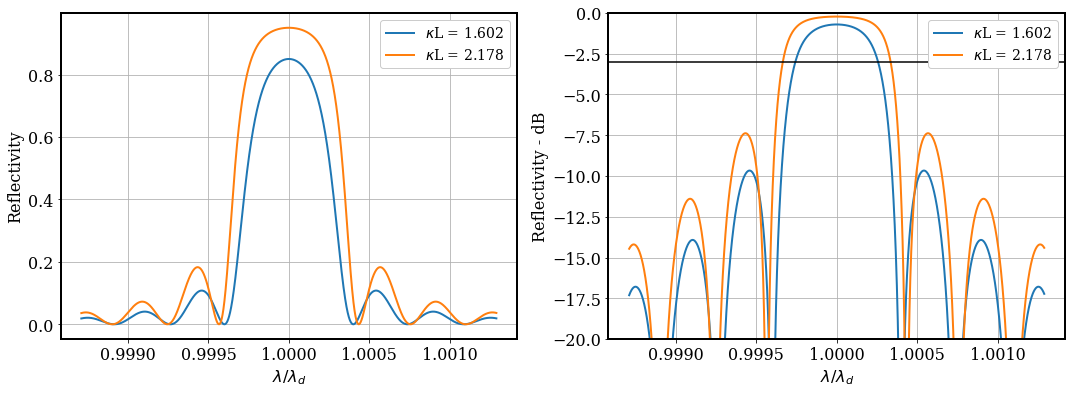

In [99]:
fig12, ax = plt.subplots(1, 2, figsize=(18,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

ax[0].plot(lambd/wave_max,r1,linewidth = 2, label = '$\kappa$'+'L = '+str(round(kappa_1*L, 3)))
ax[0].plot(lambd/wave_max,r2,linewidth = 2, label = '$\kappa$'+'L = '+str(round(kappa_2*L, 3)))
#ax[0].plot(lambd/wave_max,1 - r,linewidth = 2, label = '$\kappa$'+'L = '+str(round(kappa*L, 3)))
ax[0].grid(True)
#ax[0].set_ylim([0, 1])
ax[0].set_xlabel('$\lambda/\lambda_d$')
ax[0].set_ylabel('Reflectivity')
ax[0].legend(loc = 'upper right',framealpha = 1, fontsize = 14)

ax[1].plot(lambd/wave_max,10*np.log10(r1),linewidth = 2, label = '$\kappa$'+'L = '+str(round(kappa_1*L, 3)))
ax[1].plot(lambd/wave_max,10*np.log10(r2),linewidth = 2, label = '$\kappa$'+'L = '+str(round(kappa_2*L, 3)))
ax[1].axhline(y = 10*np.log10(0.5), color = 'black')
ax[1].grid(True)
ax[1].set_ylim([-20, 0])
ax[1].set_xlabel('$\lambda/\lambda_d$')
ax[1].set_ylabel('Reflectivity - dB')
ax[1].legend(loc = 'upper right',framealpha = 1, fontsize = 14)

## INTERCONNECT

In [77]:
inter = lumapi.INTERCONNECT(filename= 'fbg.icp')

Exception ignored in: <function Lumerical.__del__ at 0x000001B5245E0AF0>
Traceback (most recent call last):
  File "C:\Program Files\Lumerical\v202\api\python\lumapi.py", line 1179, in __del__
    close(self.handle)
  File "C:\Program Files\Lumerical\v202\api\python\lumapi.py", line 252, in close
    iapi.appClose(handle)
ctypes.ArgumentError: argument 1: <class 'TypeError'>: expected Session instance instead of Session


In [78]:
inter.switchtolayout()
inter.run()

In [100]:
result_ona_1 = inter.getresult('ONA_1','input 1/mode 1/gain')
result_ona_2 = inter.getresult('ONA_2','input 1/mode 1/gain')
result_ona_3 = inter.getresult('ONA_3','input 1/mode 1/gain')

In [101]:
wavelength = result_ona_1['wavelength']
gain_ona_1 = result_ona_1['TE gain (dB)']
gain_ona_2 = result_ona_2['TE gain (dB)']
gain_ona_3 = result_ona_3['TE gain (dB)']

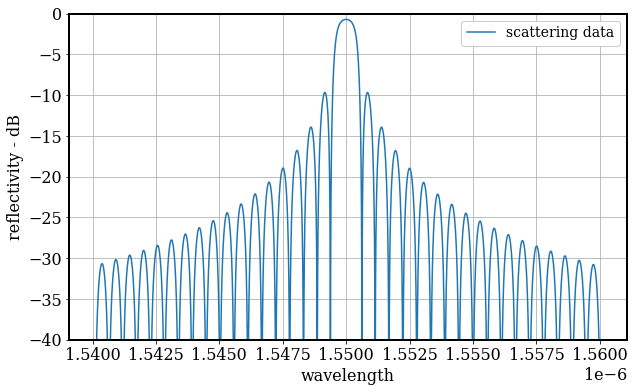

In [102]:
figure = plt.figure(figsize=(10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, gain_ona_1, label = 'scattering data')
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('reflectivity - dB')
plt.ylim([-40, 0])
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)


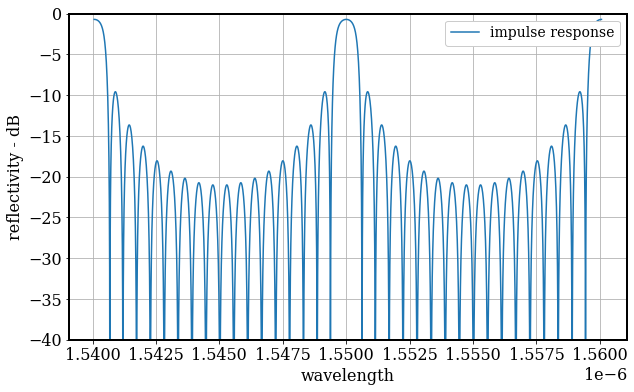

In [103]:
figure = plt.figure(figsize=(10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, gain_ona_2, label = 'impulse response')
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('reflectivity - dB')
plt.ylim([-40, 0])
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)

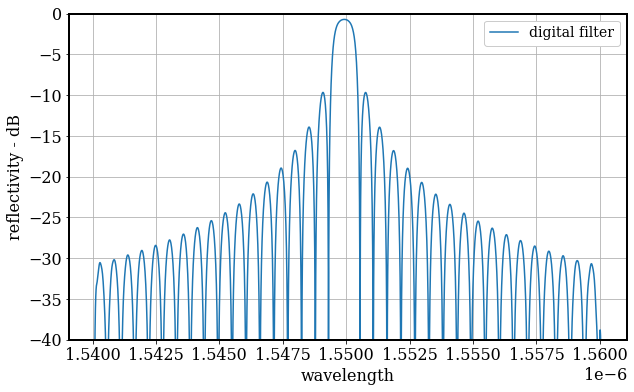

In [83]:
figure = plt.figure(figsize=(10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, gain_ona_3, label = 'digital filter')
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('reflectivity - dB')
plt.ylim([-40, 0])
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)

## increasing the bandwidth of the impulse response to 60 nm

In [85]:
inter.switchtolayout()
inter.run()

In [106]:
result_ona_2_40 = inter.getresult('ONA_2','input 1/mode 1/gain')
wavelength_ona_2_40 = result_ona_2_40['wavelength']
gain_ona_2_40 = result_ona_2_40['TE gain (dB)']

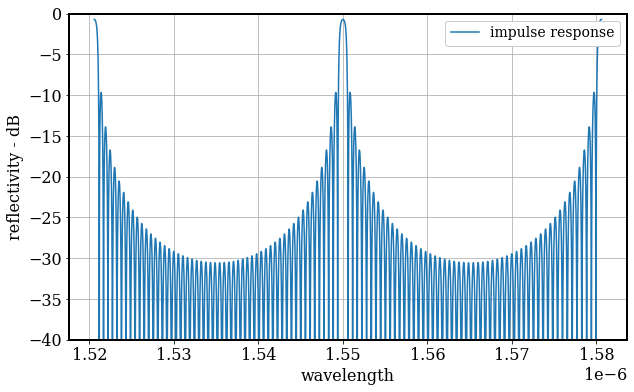

In [107]:
figure = plt.figure(figsize=(10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength_ona_2_40, gain_ona_2_40, label = 'impulse response')
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('reflectivity - dB')
plt.ylim([-40, 0])
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)

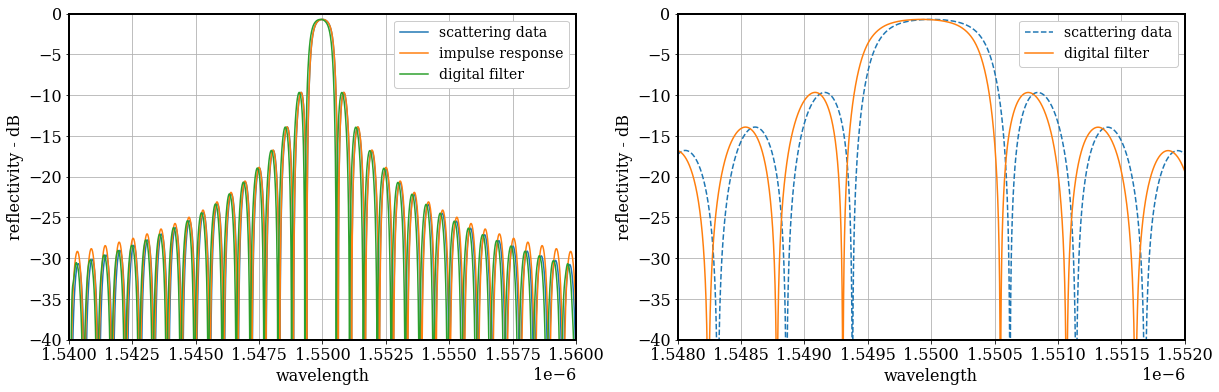

In [88]:
figure, ax = plt.subplots(1,2,figsize=(20,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

ax[0].plot(wavelength, gain_ona_1, label = 'scattering data')
ax[0].plot(wavelength_ona_2_40, gain_ona_2_40, label = 'impulse response')
ax[0].plot(wavelength, gain_ona_3, label = 'digital filter')
ax[0].grid(True)
ax[0].set_xlabel('wavelength')
ax[0].set_ylabel('reflectivity - dB')
ax[0].set_ylim([-40, 0])
ax[0].set_xlim([1540e-9, 1560e-9])
ax[0].legend(loc = 'upper right', framealpha = 1, fontsize = 14)

ax[1].plot(wavelength, gain_ona_1,'--', label = 'scattering data')
#ax[1].plot(wavelength_ona_2_40, gain_ona_2_40, label = 'impulse response')
ax[1].plot(wavelength, gain_ona_3, label = 'digital filter')
ax[1].grid(True)
ax[1].set_xlabel('wavelength')
ax[1].set_ylabel('reflectivity - dB')
ax[1].set_ylim([-40, 0])
ax[1].set_xlim([1548e-9, 1552e-9])
ax[1].legend(loc = 'upper right', framealpha = 1, fontsize = 14)